In [1]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt
#64, 69
path = './result/from_scratch_69.midi'

midi_data = pretty_midi.PrettyMIDI(path)
for instrument in midi_data.instruments:
    print(f"Instrument: {instrument.name}")
    for note in instrument.notes:
        print(f"Pitch: {note.pitch}, Start: {note.start}, End: {note.end}, Velocity: {note.velocity}")


Instrument: 
Pitch: 71, Start: 0.9661537499999999, End: 1.445325875, Velocity: 52
Pitch: 74, Start: 1.101289, End: 1.651748, Velocity: 60
Pitch: 76, Start: 1.3765185, End: 1.723176625, Velocity: 64
Pitch: 62, Start: 0.0, End: 2.223177, Velocity: 52
Pitch: 74, Start: 1.651748, End: 2.291984375, Velocity: 56
Pitch: 73, Start: 3.0593505000000003, End: 3.3450650000000004, Velocity: 60
Pitch: 76, Start: 3.6420945000000002, End: 3.9391240000000005, Velocity: 68
Pitch: 67, Start: 2.223177, End: 6.839159, Velocity: 60
Pitch: 76, Start: 3.9391240000000005, End: 6.839159, Velocity: 68
Pitch: 74, Start: 3.3450650000000004, End: 6.906726625, Velocity: 60
Pitch: 66, Start: 6.245100000000001, End: 6.974294250000001, Velocity: 52
Pitch: 71, Start: 2.773636, End: 7.041861875, Velocity: 68
Pitch: 64, Start: 6.839159, End: 7.962224000000001, Velocity: 60
Pitch: 73, Start: 6.839159, End: 10.902155500000001, Velocity: 68
Pitch: 69, Start: 7.962224000000001, End: 11.56492525, Velocity: 60
Pitch: 64, Start:

In [2]:
from music21 import converter, key

score = converter.parse('./result/from_scratch_64.midi')
key_signature = score.analyze('key')
print(f"Key: {key_signature}")

Key: E major


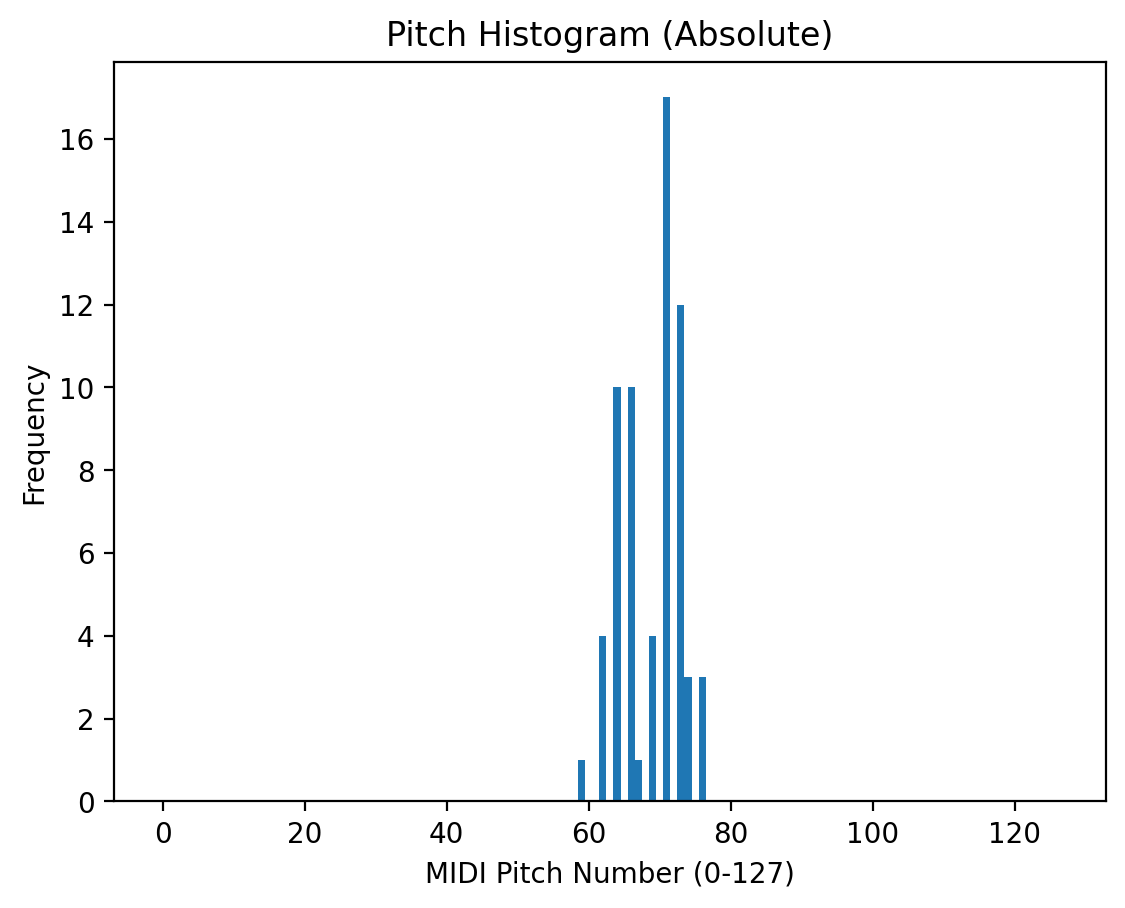

In [3]:
# Load MIDI file
midi_data = pretty_midi.PrettyMIDI(path)

# Get all pitches
pitches = []
for instrument in midi_data.instruments:
    if not instrument.is_drum:
        for note in instrument.notes:
            pitches.append(note.pitch)

# Convert to numpy array
pitches = np.array(pitches)

# Create histogram bins (0-127)
bins = np.arange(128)

# Count occurrences
hist, _ = np.histogram(pitches, bins=bins)

# Plot
plt.bar(bins[:-1], hist, width=1.0)
plt.xlabel('MIDI Pitch Number (0-127)')
plt.ylabel('Frequency')
plt.title('Pitch Histogram (Absolute)')
plt.show()


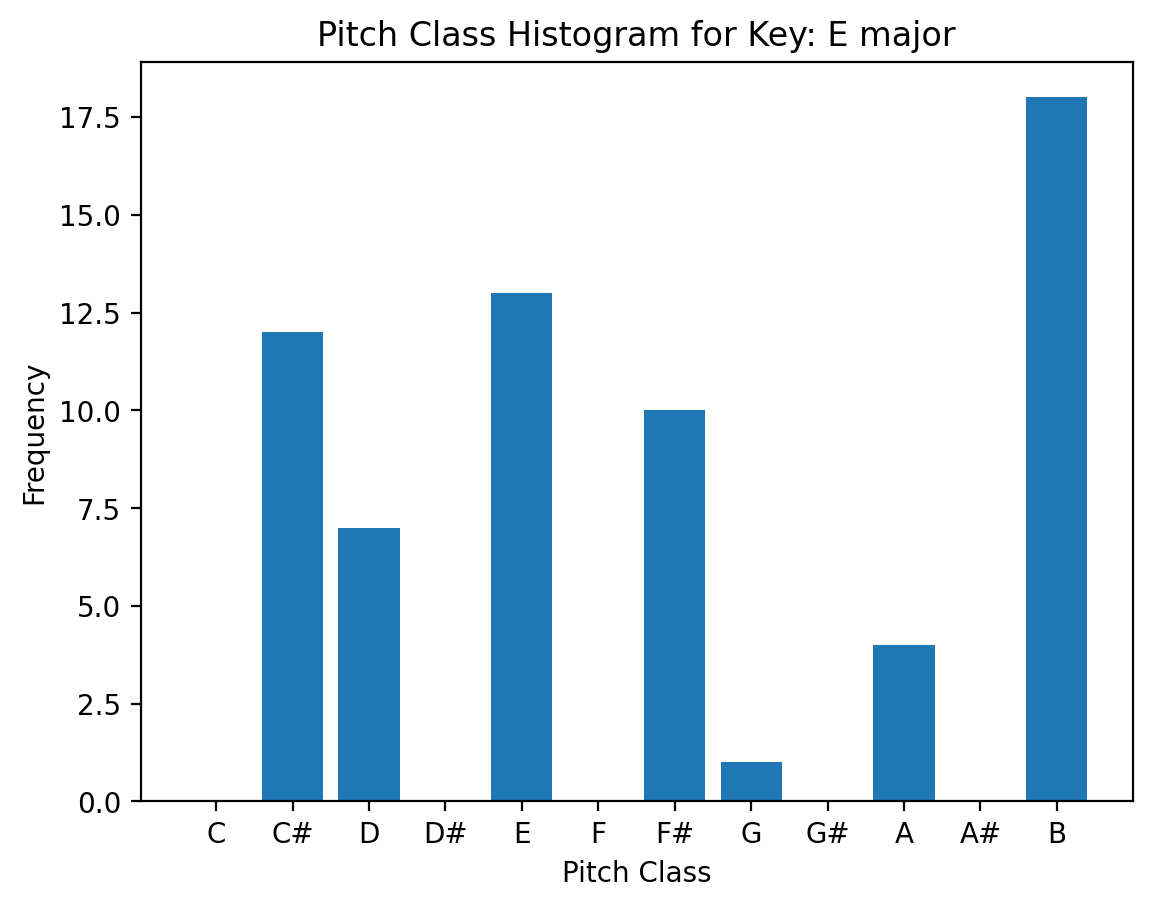

In [5]:
# Compute pitch classes
pitch_classes = pitches % 12

# Create histogram bins (0-11)
bins_pc = np.arange(13)

# Count occurrences
hist_pc, _ = np.histogram(pitch_classes, bins=bins_pc)

# Map pitch classes to note names for x-axis
pitch_class_names = ['C', 'C#', 'D', 'D#', 'E', 'F',
                     'F#', 'G', 'G#', 'A', 'A#', 'B']

# Plot
plt.bar(pitch_class_names, hist_pc)
plt.xlabel('Pitch Class')
plt.ylabel('Frequency')
plt.title(f"Pitch Class Histogram for Key: {key_signature}")
plt.show()


In [8]:
def note_per_second(midi_path):
    midi_data = pretty_midi.PrettyMIDI(midi_path)
    total_notes = sum(len(instrument.notes) for instrument in midi_data.instruments)
    total_duration = midi_data.get_end_time()
    return total_notes / total_duration if total_duration > 0 else 0


In [ ]:

# def average_note_density_per_bar(midi_path):
#     midi_data = pretty_midi.PrettyMIDI(midi_path)
    
#     note_start_times = []
#     for instrument in midi_data.instruments:
#         if not instrument.is_drum:
#             for note in instrument.notes:
#                 note_start_times.append(note.start)
    
#     note_start_times = np.array(note_start_times)
    
#     # If no notes, return 0
#     if len(note_start_times) == 0:
#         return 0
    
#     # Get tempo changes (assume constant if no changes)
#     tempo_changes_times, tempi = midi_data.get_tempo_changes()
#     tempo = tempi[0]  # Take the first tempo (in BPM)
#     # 
#     # Get time signature changes (assume 4/4 if none)
#     time_signatures = midi_data.time_signature_changes
#     if time_signatures:
#         ts = time_signatures[0]
#         numerator = ts.numerator
#         denominator = ts.denominator
#     else:
#         numerator = 4
#         denominator = 4

#     # Compute seconds per bar
#     beats_per_bar = numerator
#     seconds_per_beat = 60.0 / tempo
#     seconds_per_bar = beats_per_bar * seconds_per_beat
    
#     # Get total number of bars in piece
#     total_duration = midi_data.get_end_time()
#     total_bars = int(np.ceil(total_duration / seconds_per_bar))
    
#     # Bin notes into bars
#     bar_edges = np.arange(0, total_bars * seconds_per_bar + seconds_per_bar, seconds_per_bar)
#     notes_per_bar, _ = np.histogram(note_start_times, bins=bar_edges)
    
#     # Compute average notes per bar
#     avg_density = np.mean(notes_per_bar)
    
#     return avg_density

# # Example usage:
# avg_density = average_note_density_per_bar(path)
# print(f"Average horizontal note density per bar: {avg_density:.2f} notes/bar")


Average horizontal note density per bar: 3.82 notes/bar


In [9]:
midi_folder = './result/'

In [14]:
import glob
import os
midi_files = glob.glob(os.path.join(midi_folder, 'from_scratch_*.midi'))

# Process each file and store results
results = []
for midi_file in midi_files:
    density = note_per_second(midi_file)
    print(f"{os.path.basename(midi_file)}: {density:.2f} notes/second")
    results.append({'file': os.path.basename(midi_file), 'density': density})

# Optionally — convert to a pandas DataFrame if you want
import pandas as pd
df = pd.DataFrame(results)
print(df)


from_scratch_1137.midi: 6.18 notes/second
from_scratch_896.midi: 20.91 notes/second
from_scratch_310.midi: 11.10 notes/second
from_scratch_1743.midi: 18.52 notes/second
from_scratch_1295.midi: 1.56 notes/second
from_scratch_381.midi: 7.21 notes/second
from_scratch_109.midi: 3.90 notes/second
from_scratch_731.midi: 3.63 notes/second
from_scratch_19.midi: 7.72 notes/second
from_scratch_1686.midi: 21.04 notes/second
from_scratch_1780.midi: 19.98 notes/second
from_scratch_1605.midi: 8.37 notes/second
from_scratch_324.midi: 7.67 notes/second
from_scratch_2073.midi: 6.00 notes/second
from_scratch_1100.midi: 10.89 notes/second
from_scratch_371.midi: 11.06 notes/second
from_scratch_899.midi: 7.18 notes/second
from_scratch_100.midi: 9.28 notes/second
from_scratch_590.midi: 16.01 notes/second
from_scratch_1976.midi: 12.58 notes/second
from_scratch_114.midi: 8.15 notes/second
from_scratch_1209.midi: 7.23 notes/second
from_scratch_1053.midi: 3.71 notes/second
from_scratch_495.midi: 14.83 notes/sec

In [65]:
df

,file_name,densities
0,file1,8
1,file2,12
2,file3,9
3,file4,11
4,file5,10


In [12]:
densities = df['density'].values

In [13]:
df[df['density'] > 20].count()

file       110
density    110
dtype: int64

In [15]:
df.sort_values(by='density', ascending=False)

,file,density
555,from_scratch_1473.midi,33.524808
545,from_scratch_664.midi,32.148218
1370,from_scratch_1549.midi,32.074338
995,from_scratch_1705.midi,31.578274
1193,from_scratch_2044.midi,31.560938
...,...,...
1508,from_scratch_106.midi,1.430554
1998,from_scratch_524.midi,1.387255
514,from_scratch_1419.midi,1.327256
1030,from_scratch_1050.midi,1.173506


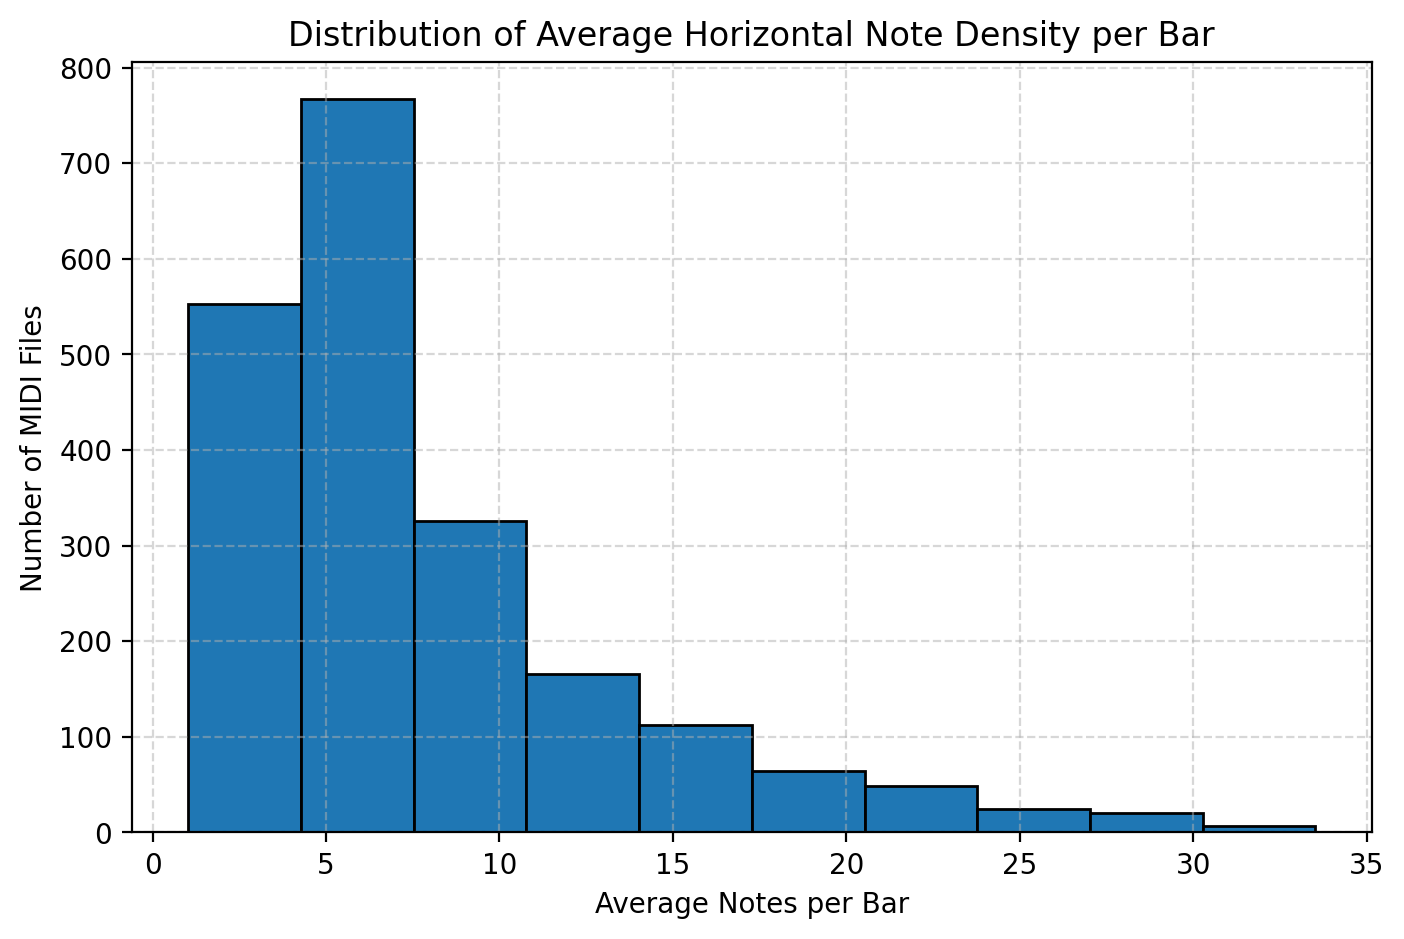

In [17]:
plt.figure(figsize=(8, 5))
plt.hist(densities, bins=10, edgecolor='black')
plt.xlabel('Average Notes per Bar')
plt.ylabel('Number of MIDI Files')
plt.title('Distribution of Average Horizontal Note Density per Bar')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Now say I want songs with average bar note density following a normal distribution centered around 70 with variance 10. 

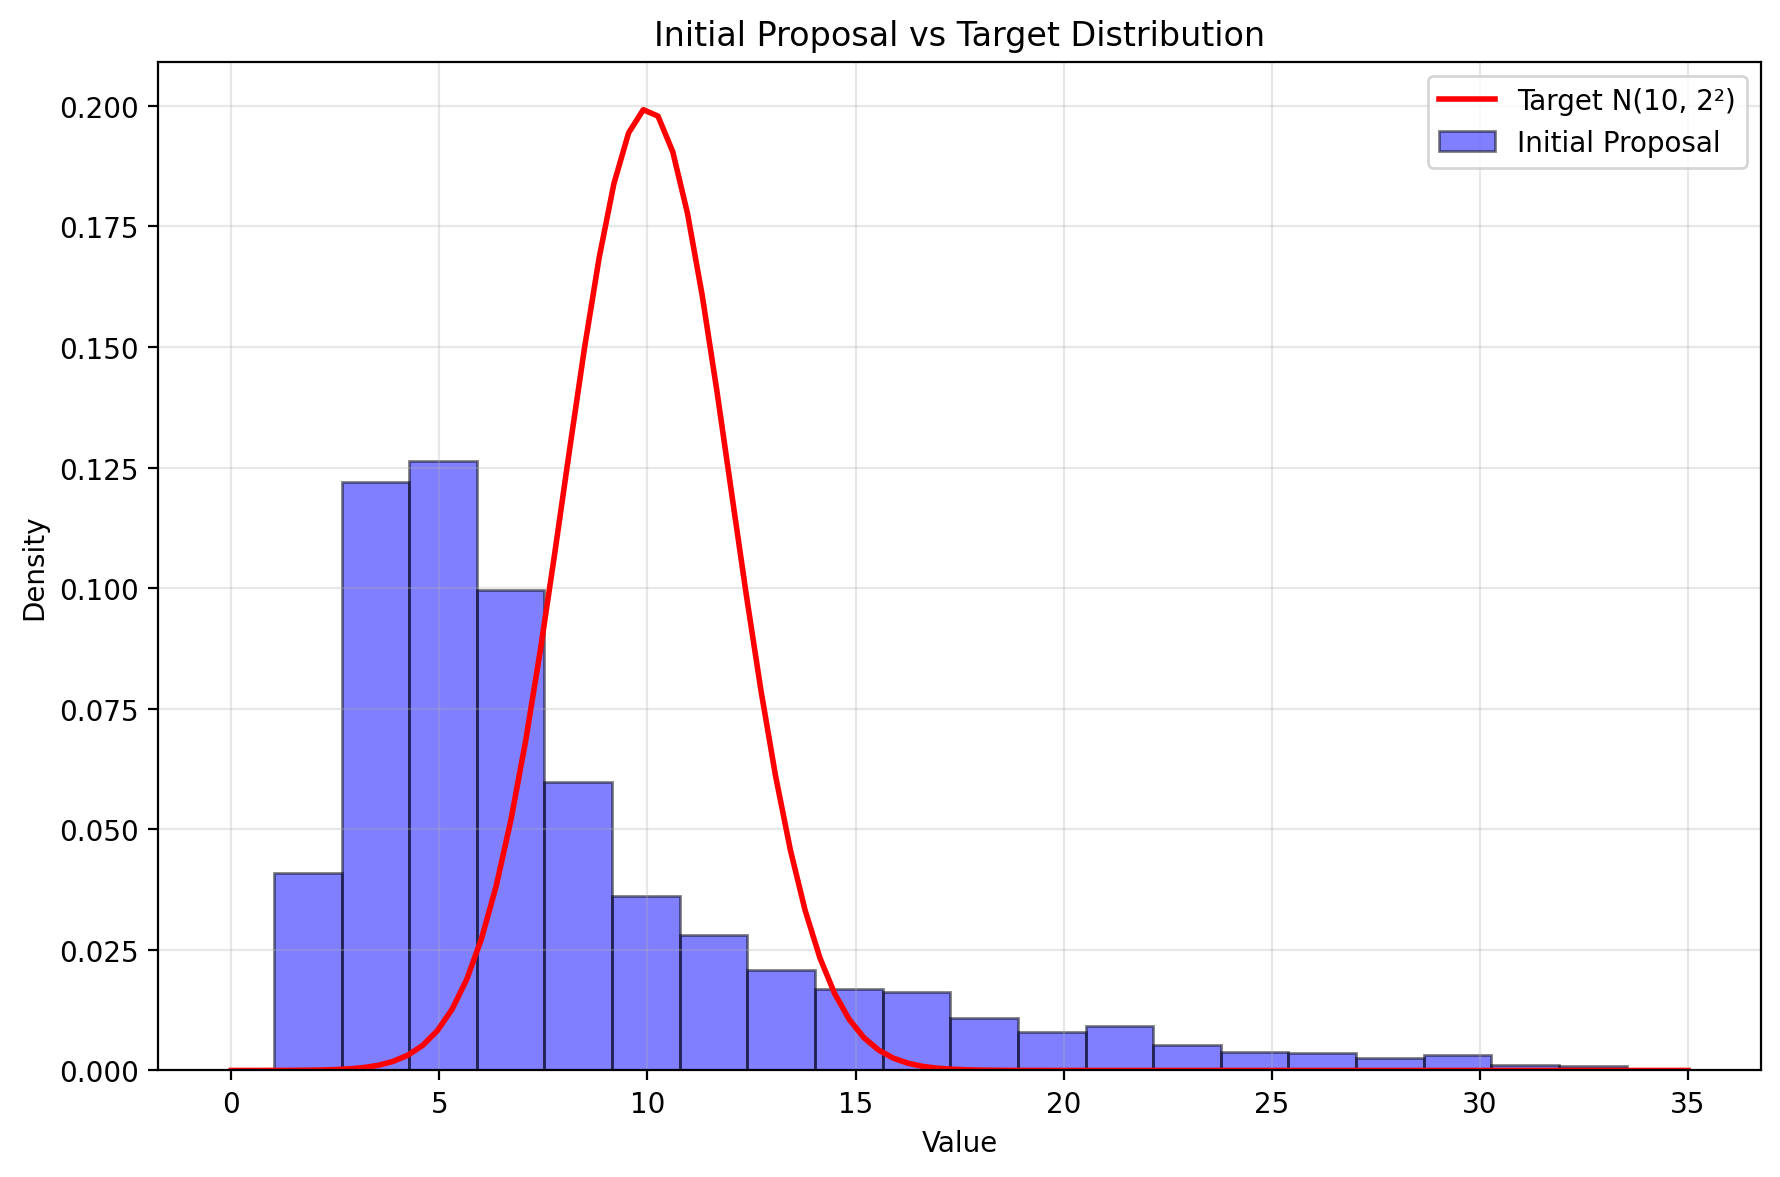

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# Set random seed for reproducibility
np.random.seed(42)

# Target distribution parameters (Normal)
target_mean = 10
target_std = 2

num_iterations = 3

samples = np.copy(densities)

x = np.linspace(0, 35,100)
target_pdf_values = norm.pdf(x, loc=target_mean, scale=target_std)

proposal_kde = gaussian_kde(samples)

# Plot initial state
plt.figure(figsize=(9, 6))
plt.plot(x, target_pdf_values, label=f'Target N({target_mean}, {target_std}²)', color='red', linewidth=2)
plt.hist(samples, bins=20, density=True, alpha=0.5, label='Initial Proposal', color='blue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Initial Proposal vs Target Distribution')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




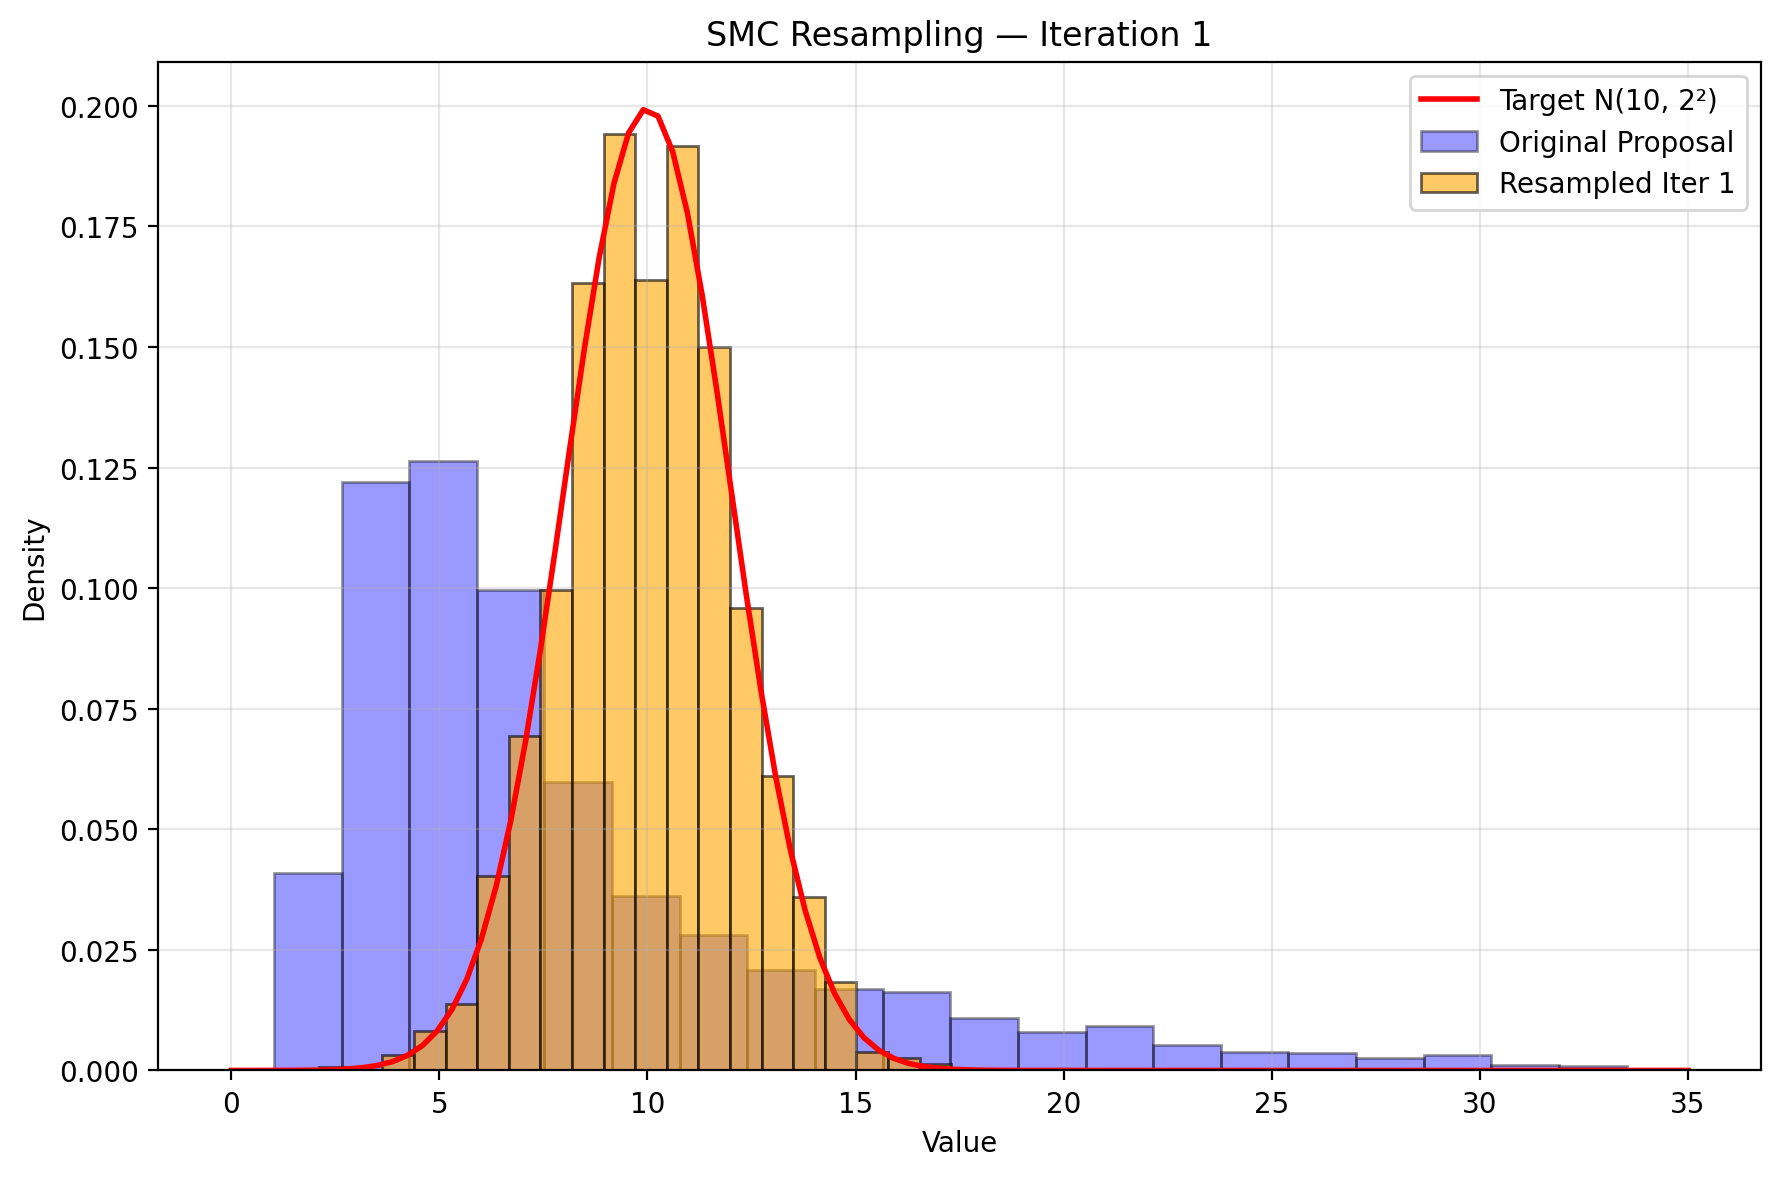

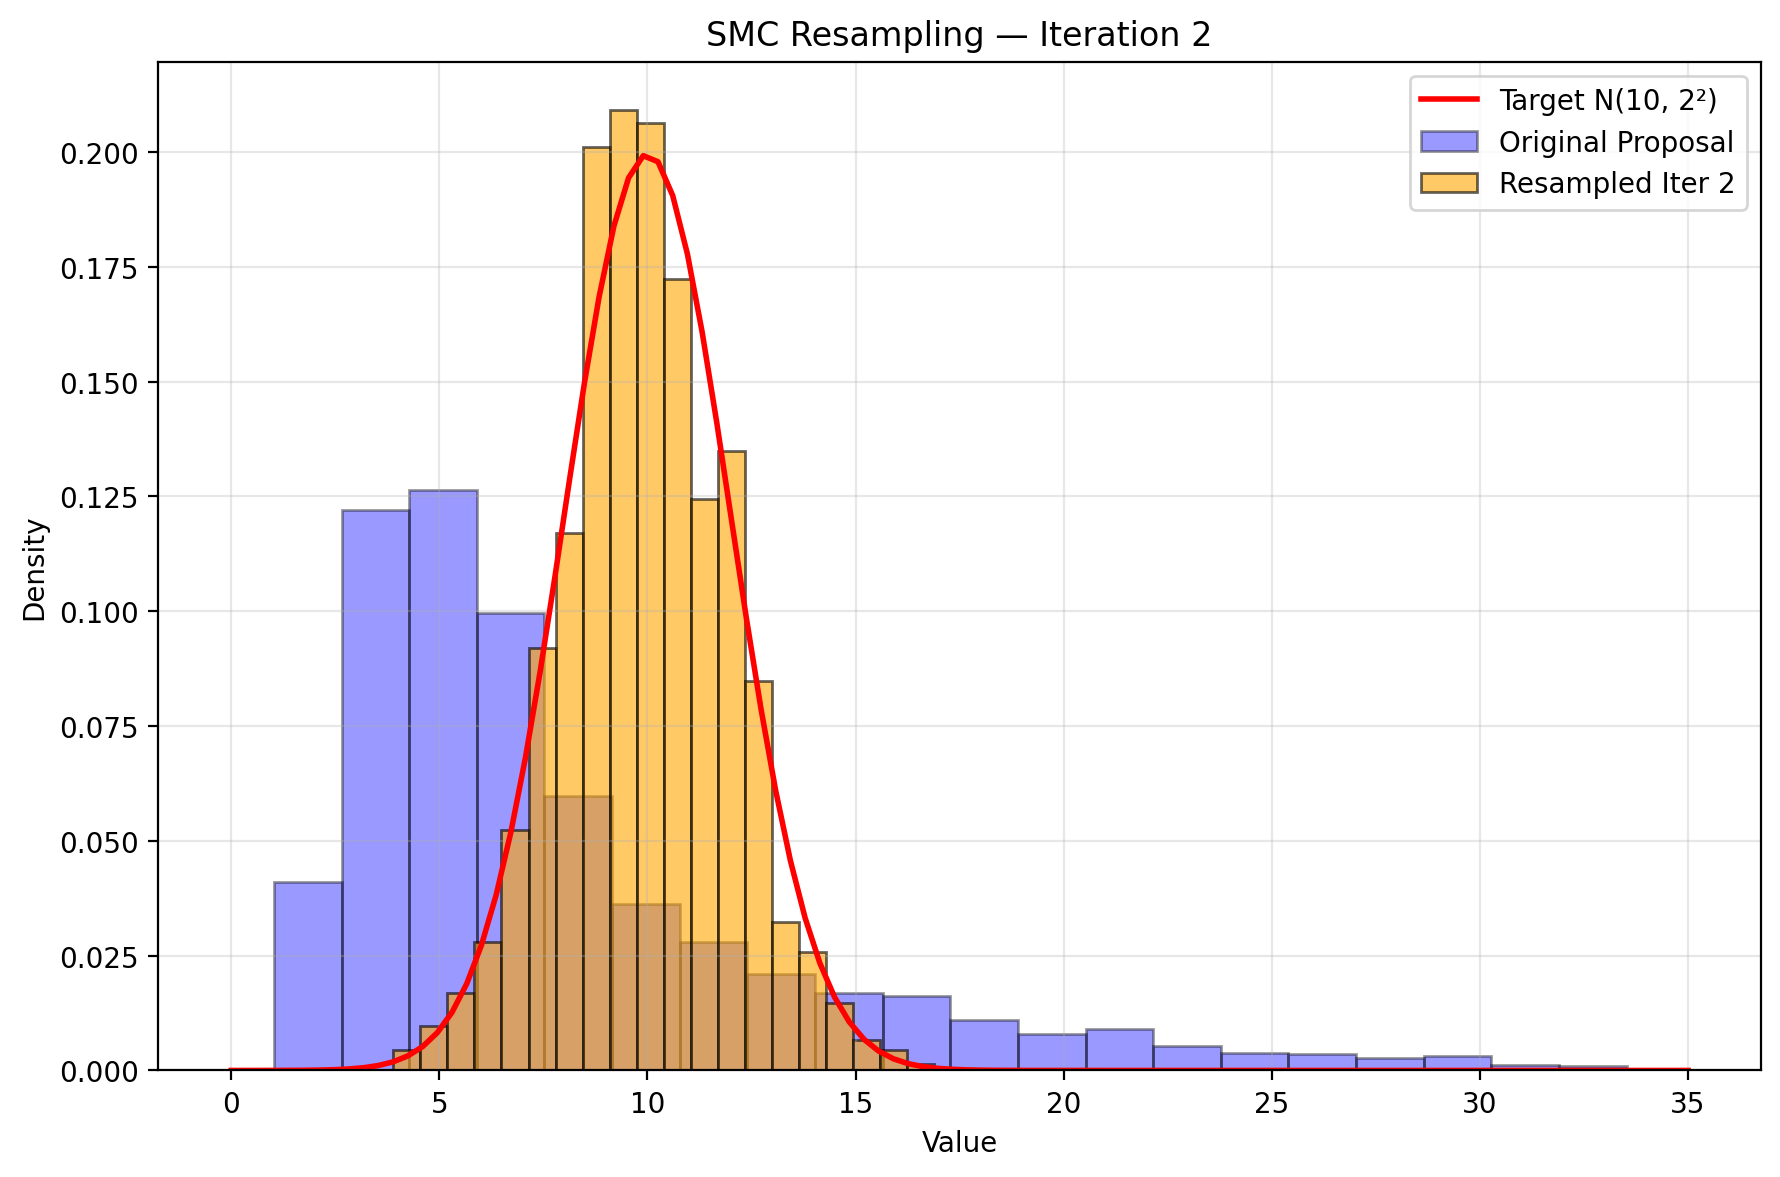

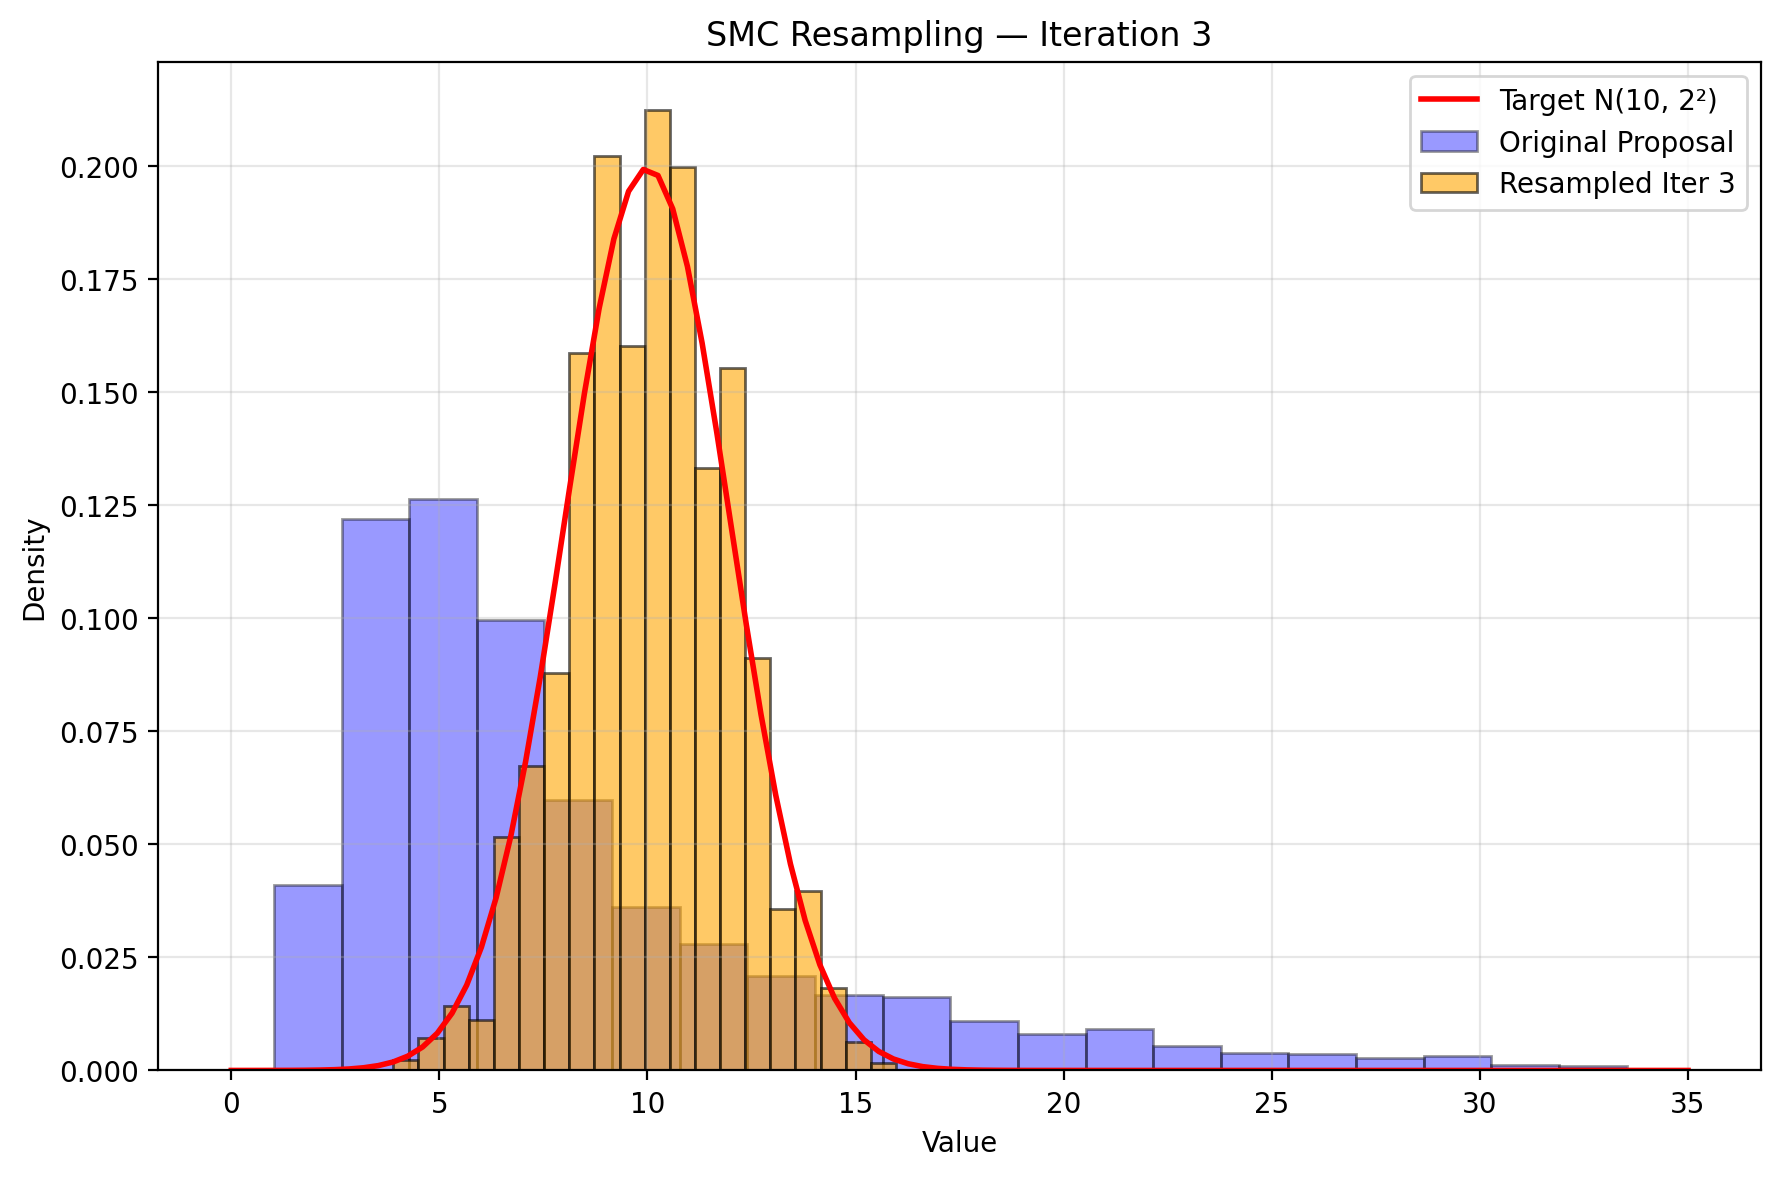

In [ ]:
# Sequential Monte Carlo (SMC) Resampling Loop
file_names = np.copy(df['file_name'].values)
for iteration in range(num_iterations):
    # Compute target density at the sample points
    target_density = norm.pdf(samples, loc=target_mean, scale=target_std)
 
    # Compute proposal KDE density at the sample points
    proposal_density = proposal_kde(samples)

    # Avoid division by zero
    proposal_density = np.clip(proposal_density, 1e-300, None)

    # Importance weights
    weights = target_density / proposal_density
    weights /= np.sum(weights)

    # Resample according to weights
    resampled_indices = np.random.choice(len(samples), size=len(samples), replace=True, p=weights)
    samples = samples[resampled_indices]

    # Update proposal KDE with resampled samples
    proposal_kde = gaussian_kde(samples)

    plt.figure(figsize=(9, 6))

    # Target distribution
    plt.plot(x, target_pdf_values, label=f'Target N({target_mean}, {target_std}²)', color='red', linewidth=2)

    # Original proposal distribution
    plt.hist(densities, bins=20, density=True, alpha=0.4, label='Original Proposal', color='blue', edgecolor='black')

    # Resampled distribution after current iteration
    plt.hist(samples, bins=20, density=True, alpha=0.6, label=f'Resampled Iter {iteration+1}', color='orange', edgecolor='black')

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'SMC Resampling — Iteration {iteration+1}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()